In [1]:
import carbonbench

import numpy as np
import pandas as pd

In [2]:
import importlib
import carbonbench
importlib.reload(carbonbench)

<module 'carbonbench' from '/home/aleksei/Documents/Research/CarbonBench/carbonbench/__init__.py'>

# Process Targets

In [3]:
# 1 Process targets
# 1.1 Load targets
targets = ['GPP_NT_VUT_USTAR50', 'RECO_NT_VUT_USTAR50', 'NEE_VUT_USTAR50']
include_qc = True
y = carbonbench.load_targets(targets, include_qc)
y

,date,site,lat,lon,IGBP,Koppen,GPP_NT_VUT_USTAR50,RECO_NT_VUT_USTAR50,NEE_VUT_USTAR50,NEE_VUT_USTAR50_QC
0,2009-01-01,FLX_AR-SLu,-33.464800,-66.459800,MF,B,8.989840,2.957700,-6.032130,0.0
1,2009-01-02,FLX_AR-SLu,-33.464800,-66.459800,MF,B,8.912250,2.977330,-5.934920,0.0
2,2009-01-03,FLX_AR-SLu,-33.464800,-66.459800,MF,B,9.356500,3.330460,-6.026040,0.0
3,2009-01-04,FLX_AR-SLu,-33.464800,-66.459800,MF,B,9.826600,3.794460,-6.032130,0.0
4,2009-01-05,FLX_AR-SLu,-33.464800,-66.459800,MF,B,9.727970,3.793040,-5.934920,0.0
...,...,...,...,...,...,...,...,...,...,...
1435909,2023-12-27,JPX_JP-Tmd,42.735911,141.523147,DBF,D,1.013866,0.617556,-0.396310,0.0
1435910,2023-12-28,JPX_JP-Tmd,42.735911,141.523147,DBF,D,0.738017,0.734304,-0.003712,0.0
1435911,2023-12-29,JPX_JP-Tmd,42.735911,141.523147,DBF,D,0.744890,0.765398,0.020508,0.0
1435912,2023-12-30,JPX_JP-Tmd,42.735911,141.523147,DBF,D,0.470808,0.907578,0.436770,0.0


In [4]:
# 1.2 Explore targets
print(f"Total number of sites: {y.site.nunique()}")
print(f"Total number of samples: {len(y)}, QC∈[0,1]")
if include_qc:
    print(f"Total number of top-quality samples: {len(y[y.NEE_VUT_USTAR50_QC==1])}, QC=1")

Total number of sites: 567
Total number of samples: 1304309, QC∈[0,1]
Total number of top-quality samples: 553467, QC=1


Train sites: 438, Test sites: 129

Koppen balance:
        overall  test
Koppen               
A            19     4
B            55    13
C           194    45
D           284    62
E            15     5


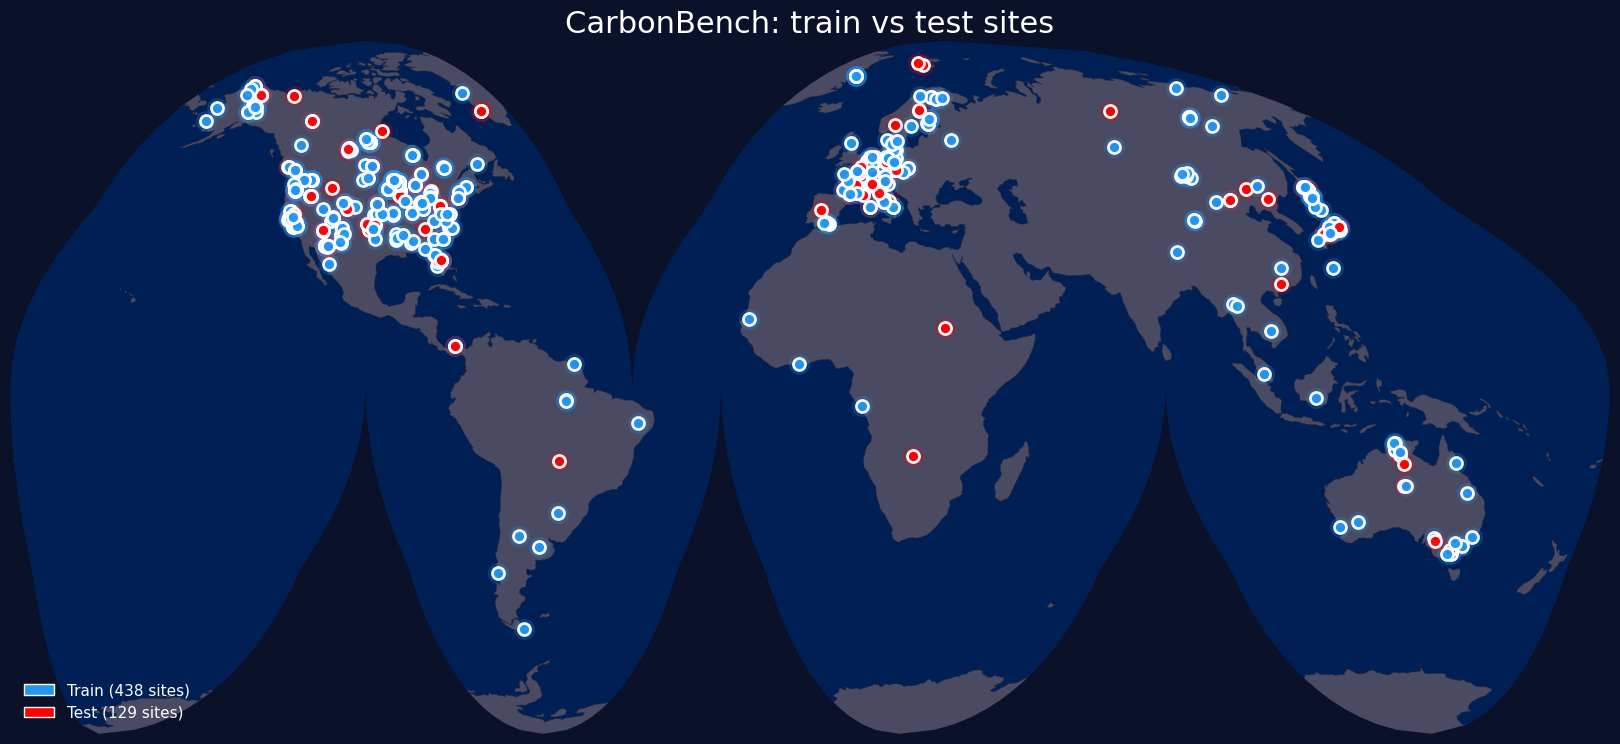

In [5]:
# 1.3 Split targets on train and test (site holdout)
split_type = 'zero-shot'# 'few-shot'
y_train, y_test = carbonbench.split_targets(y, split_type, verbose=True, plot=True)

In [4]:
# 1.3 (alternative) Split targets on train and test (15 random days for fine-tuning)
split_type = 'few-shot' 
y_train, y_test, y_finetune = carbonbench.split_targets(y, split_type, verbose=True, plot=False)

Train: 438, Test: 129

Koppen balance:
        overall  test
Koppen               
A            19     4
B            55    13
C           194    45
D           284    62
E            15     5


# Process Features

In [6]:
modis = carbonbench.load_modis()
modis

,site,date,sur_refl_b01,sur_refl_b02,sur_refl_b03,sur_refl_b04,sur_refl_b05,sur_refl_b06,sur_refl_b07,SensorZenith,SensorAzimuth,SolarZenith,SolarAzimuth,clouds
0,AMF_US-LS2,2000-02-24,0.613278,0.615670,0.602804,0.604110,0.554230,0.283238,0.156970,9.386184,-79.039375,43.821296,156.984799,1.000000
1,AMF_US-LS2,2000-02-25,0.136111,0.202526,0.068453,0.097170,0.262865,0.269524,0.195073,63.403740,-73.862170,41.007709,172.133518,0.000000
2,AMF_US-LS2,2000-02-26,0.198556,0.274010,0.106419,0.148969,0.336809,0.317314,0.226733,15.836840,100.399168,44.201395,152.683881,0.393236
3,AMF_US-LS2,2000-02-27,0.141464,0.206640,0.070379,0.101384,0.263974,0.266153,0.193892,54.245268,-75.731891,40.708107,167.582859,0.000000
4,AMF_US-LS2,2000-02-29,0.320863,0.382763,0.260131,0.282804,0.443713,0.440773,0.340389,41.004591,-77.339869,40.611928,162.978168,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5028655,AMF_US-CF1,2024-12-27,0.813195,0.805628,0.806056,0.802267,0.721094,0.420340,0.256020,45.772325,-72.211927,72.305738,160.958708,1.000000
5028656,AMF_US-CF1,2024-12-28,0.557387,0.548494,0.534401,0.552809,0.512329,0.366377,0.230692,37.173131,97.334428,76.600823,147.732137,1.000000
5028657,AMF_US-CF1,2024-12-29,0.759710,0.726192,0.795111,0.772561,0.629053,0.402178,0.241436,24.242120,-75.732560,73.405325,156.433870,1.000000
5028658,AMF_US-CF1,2024-12-30,0.212531,0.325263,0.140560,0.191962,0.308957,0.202839,0.096885,54.688965,94.228950,78.382258,143.489081,1.000000


In [7]:
era_feature_set = 'minimal' # minimal (6), stanard (36), full (150)
era = carbonbench.load_era(era_feature_set)
era

,date,site,temperature_2m,total_precipitation_sum,surface_net_solar_radiation_sum,total_evaporation_sum,leaf_area_index_high_vegetation,leaf_area_index_low_vegetation
0,2000-01-01,AMF_US-LS2,281.577934,9.713088e-09,1.152728e+07,-0.000053,0.228888,0.650389
1,2000-01-02,AMF_US-LS2,276.370425,1.462151e-03,8.536294e+06,-0.000236,0.228888,0.650389
2,2000-01-03,AMF_US-LS2,274.310145,1.327357e-04,1.194691e+07,-0.000253,0.228888,0.650389
3,2000-01-04,AMF_US-LS2,275.807878,1.722592e-06,1.221311e+07,-0.000177,0.228888,0.650389
4,2000-01-05,AMF_US-LS2,279.995917,2.997001e-06,1.204377e+07,-0.000189,0.228888,0.650389
...,...,...,...,...,...,...,...,...
5232631,2024-12-27,AMF_US-CF1,274.922023,3.970727e-03,9.663404e+05,-0.000207,2.513429,0.954766
5232632,2024-12-28,AMF_US-CF1,276.411315,8.683285e-03,2.895641e+06,-0.000533,2.513120,0.949525
5232633,2024-12-29,AMF_US-CF1,275.785251,9.537466e-03,1.201130e+06,-0.000295,2.512851,0.944290
5232634,2024-12-30,AMF_US-CF1,274.386050,5.481761e-03,3.758304e+06,-0.000612,2.512551,0.939092


In [8]:
train = carbonbench.join_features(y_train, modis, era)
test = carbonbench.join_features(y_test, modis, era)

In [ ]:
X_train_temporal, y_train_temporal = carbonbench.sliding_window(train, targets, include_qc, window_size=5, stride=1)
X_train_temporal.shape, y_train_temporal.shape

In [9]:
'''Sliding Window (for temporal modeling)'''
X_train_temporal, y_train_temporal = sliding_window(train, targets, include_qc, interpolate)
X_test_temporal, y_test_temporal = sliding_window(test, targets, include_qc, interpolate)

'''Tabular Processing (ANN, tree models etc.)'''
X_train_tab, y_train_tab = tabular(train) #dropnan
X_test_tab, y_test_tab = tabular(test) #dropnan

# Baselines

## Tree Models

In [10]:
# LightGBM

# PyTorch

In [11]:
# DataLoader

In [12]:
# hyperparams

In [13]:
# LSTM, GRU, Transformer